In [1]:
# Importing Libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import matplotlib.pyplot as plt




In [2]:

count = 0 
base_dir = r'C:\Users\Dell\OneDrive\Pictures\Documents\Code\python\OpenCV\2024_HK2_TGMT_TanDung_Phan_21T1020317\Project\Code\DatasetImageFlowers'
dirs = os.listdir(base_dir)
for dir in dirs:
    image_dir = os.path.join(base_dir, dir)
    if os.path.isdir(image_dir):
        files = os.listdir(image_dir)
        print(dir + ' Folder has ' + str(len(files)) + ' Images')
        count += len(files)
print('Images Folder has ' + str(count) + ' Images')


Hoa Bo Cong Anh Folder has 1052 Images
Hoa Calimerio Folder has 2007 Images
Hoa Cam Tu Cau Folder has 2014 Images
Hoa Cat Tuong Folder has 2090 Images
Hoa Cuc Folder has 1939 Images
Hoa Cuc Dai Folder has 764 Images
Hoa Cuc PingPong Folder has 1967 Images
Hoa Hong Folder has 784 Images
Hoa Huong Duong Folder has 733 Images
Hoa Tana Folder has 2049 Images
Hoa Tulip Folder has 984 Images
Images Folder has 16383 Images


In [3]:
# Tạo các tập dữ liệu huấn luyện và kiểm tra
img_size = 180
batch = 32
train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed=123,
                                                       validation_split=0.2,
                                                       subset='training',
                                                       batch_size=batch,
                                                       image_size=(img_size, img_size))

val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                     seed=123,
                                                     validation_split=0.2,
                                                     subset='validation',
                                                     batch_size=batch,
                                                     image_size=(img_size, img_size))

flower_names = train_ds.class_names
print(flower_names)


Found 16383 files belonging to 11 classes.
Using 13107 files for training.
Found 16383 files belonging to 11 classes.
Using 3276 files for validation.
['Hoa Bo Cong Anh', 'Hoa Calimerio', 'Hoa Cam Tu Cau', 'Hoa Cat Tuong', 'Hoa Cuc', 'Hoa Cuc Dai', 'Hoa Cuc PingPong', 'Hoa Hong', 'Hoa Huong Duong', 'Hoa Tana', 'Hoa Tulip']


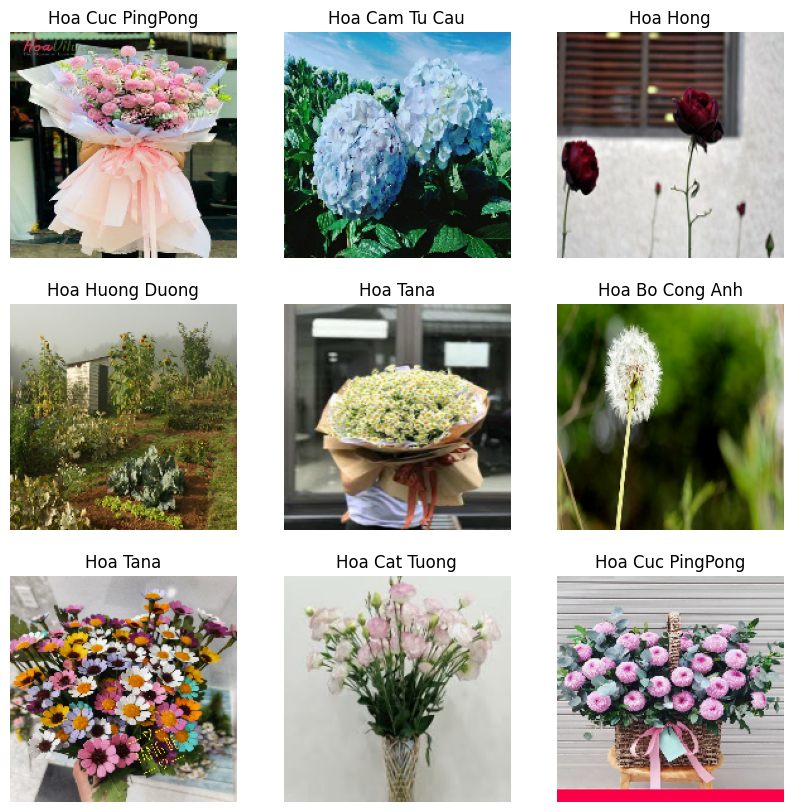

In [4]:
# Hiển thị một số hình ảnh mẫu từ tập huấn luyện
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')
plt.show()


In [4]:
# Tăng cường dữ liệu và cải thiện hiệu suất
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Cập nhật tăng cường dữ liệu
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),  #Lật ngang
    layers.RandomRotation(0.1),       #Xoay
    layers.RandomZoom(0.1)            #Phóng
])

# # Hiển thị hình ảnh sau khi tăng cường dữ liệu
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#     for i in range(9):
#         augmented_images = data_augmentation(images)
#         plt.subplot(3, 3, i + 1)
#         plt.imshow(augmented_images[0].numpy().astype('uint8'))
#         plt.axis('off')
# plt.show()


In [5]:
# Xây dựng mô hình với lớp Input đầu tiên
model = Sequential([
    layers.Input(shape=(img_size, img_size, 3)),
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(flower_names))
])

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# In tóm tắt mô hình
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [6]:
# Huấn luyện mô hình
history = model.fit(train_ds, epochs=15, validation_data=val_ds)


Epoch 1/15
410/410 [==============================] - 365s 735ms/step - loss: 1.6711 - accuracy: 0.4137 - val_loss: 1.3882 - val_accuracy: 0.5311
Epoch 2/15
410/410 [==============================] - 288s 702ms/step - loss: 1.1715 - accuracy: 0.6072 - val_loss: 1.2658 - val_accuracy: 0.6074
Epoch 3/15
410/410 [==============================] - 288s 700ms/step - loss: 0.9240 - accuracy: 0.6970 - val_loss: 1.0359 - val_accuracy: 0.6676
Epoch 4/15
410/410 [==============================] - 290s 705ms/step - loss: 0.7887 - accuracy: 0.7450 - val_loss: 0.8336 - val_accuracy: 0.7338
Epoch 5/15
410/410 [==============================] - 310s 755ms/step - loss: 0.6965 - accuracy: 0.7765 - val_loss: 0.9298 - val_accuracy: 0.7179
Epoch 6/15
410/410 [==============================] - 279s 681ms/step - loss: 0.6280 - accuracy: 0.8038 - val_loss: 0.7235 - val_accuracy: 0.7814
Epoch 7/15
410/410 [==============================] - 285s 696ms/step - loss: 0.5846 - accuracy: 0.8146 - val_loss: 0.9413 -

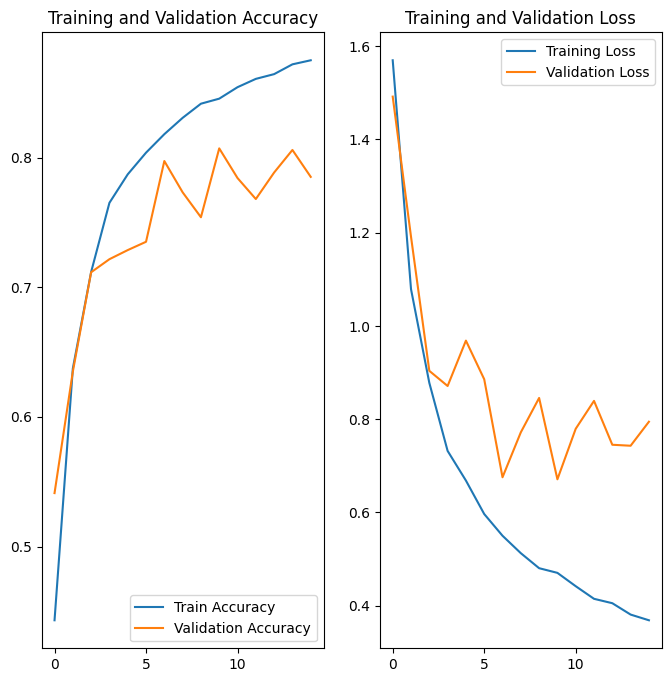

In [8]:
# Vẽ biểu đồ độ chính xác và tổn thất trong quá trình huấn luyện và kiểm tra
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [8]:
# Hàm phân loại hình ảnh
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(img_size, img_size))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of ' + str(np.max(result) * 100)
    return outcome

# Phân loại hình ảnh mẫu
print(classify_images('C:/Users/Dell/OneDrive/Pictures/Documents/Code/python/OpenCV/2024_HK2_TGMT_TanDung_Phan_21T1020317/Project/Code/DatasetImageFlowers/Hoa Calimerio/000003.jpg'))



1/1 [==============================] - 0s 39ms/step
The Image belongs to Hoa Calimerio with a score of 99.94133710861206


In [9]:
# Lưu mô hình với phần mở rộng .keras (định dạng Keras native)
model.save('Flower_Recog_Model.keras')
